<h1>US Visa Prediction Project</h1>
<br>
<h3>Life cycle of Machine learning Project</h3>

    
  Understanding the Problem Statement
  Data Collection
  Exploratory data analysis
  Data Cleaning
  Data Pre-Processing
  Model Training
  Choose best model
    

<h3>About</h3>
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

<h3>1) Problem statement.</h3>

OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.
In this project we are going to use the data given to build a Classification model:

This model is to check if Visa get approved or not based on the given dataset.
This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.
<h3>2) Data Collection.</h3>
The Dataset is part of Office of Foreign Labor Certification (OFLC)
The data consists of 25480 Rows and 12 Columns
<a href=https://www.kaggle.com/datasets/moro23/easyvisa-dataset>Dataset Link</a>

<h3>2.1 Import Data and Required Packages</h3>



 Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv(r"Visadataset.csv")

show top 5 records

In [5]:
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.shape

(25480, 12)

In [7]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<h3> 3) Exploring Data

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
---------------------------
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
---------------------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
---------------------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
---------------------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
---------------------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.90345

<h3>Insights</h3>

<b>case_id</b> have unique vlaues for each column which can be dropped as it it of no importance <br>
<b>continent</b> column is highly biased towards asia. hence we can combine other categories to form a single category.<br>
<b>unit_of_wage</b> seems to be an important column as most of them are yearly contracts.

<h3>Univariate Analysis</h3>
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.<br>

<h4>Other Type of Analysis are</h4>

<b>Bivariate Analysis:</b> The analysis of two variables.<br>
<b>Multivariate Analysis:</b> The analysis of two or more variables.

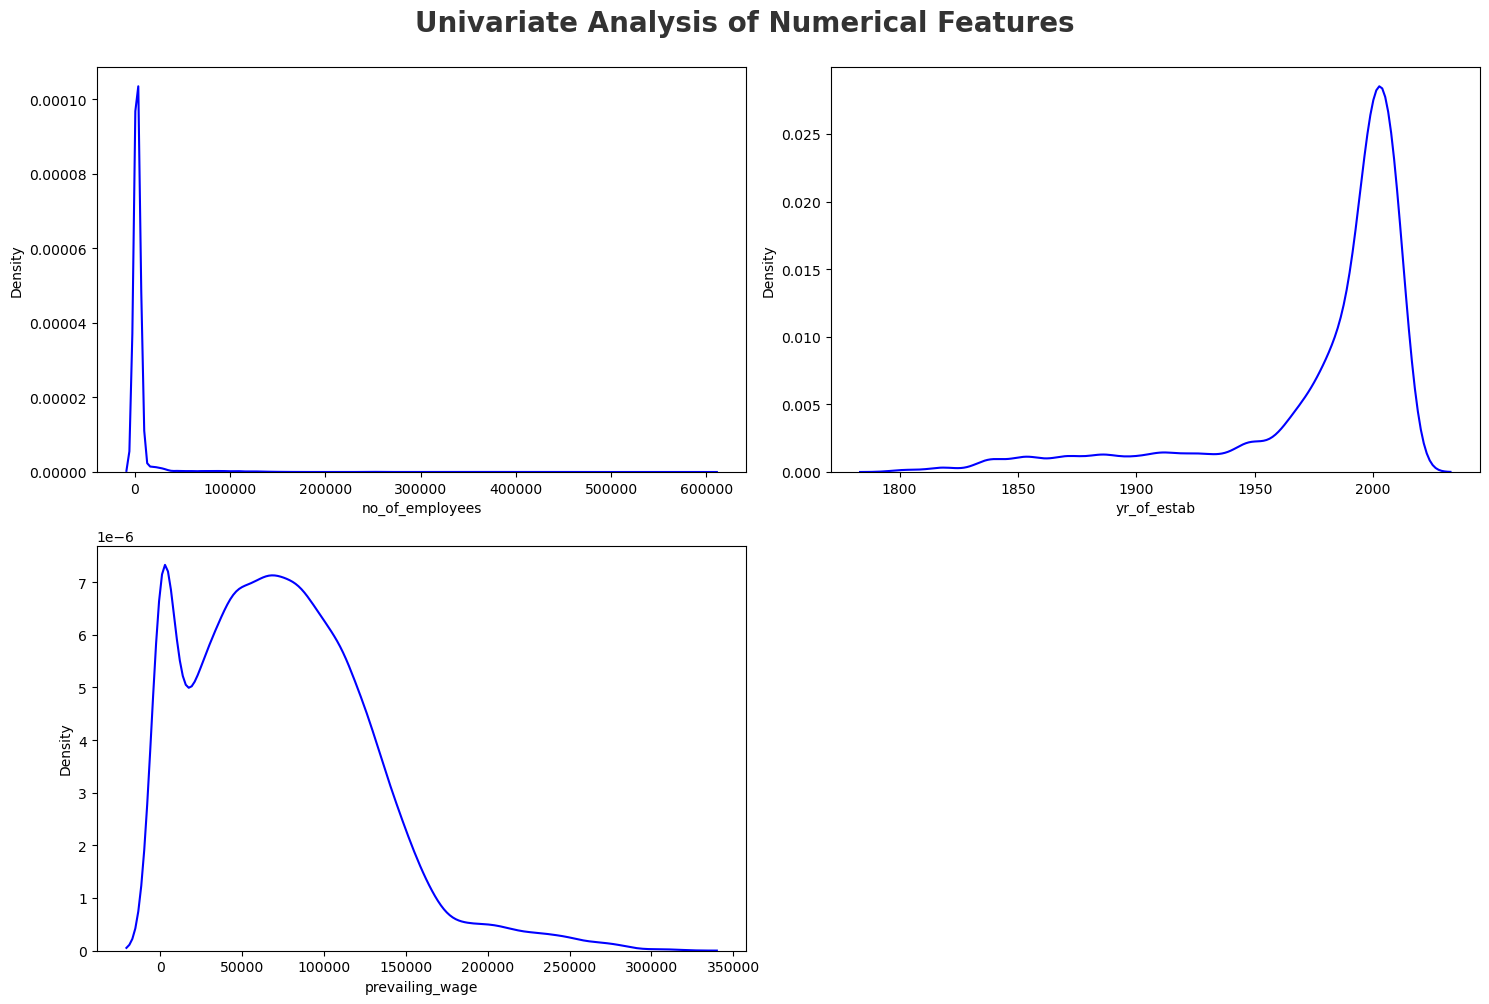

In [12]:
# Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

<h3>Insights</h3>

<b>no_of_employees</b> no_of_employees column looks more skewed but it may be because of outlies.<br>
<b>yr_of_estab</b> yr_of_estab is a discrete feature.<br>
<b>privailing-wage</b> privailing-wage is a right-skewed distribution.

<h3>Categorical Features</h3>

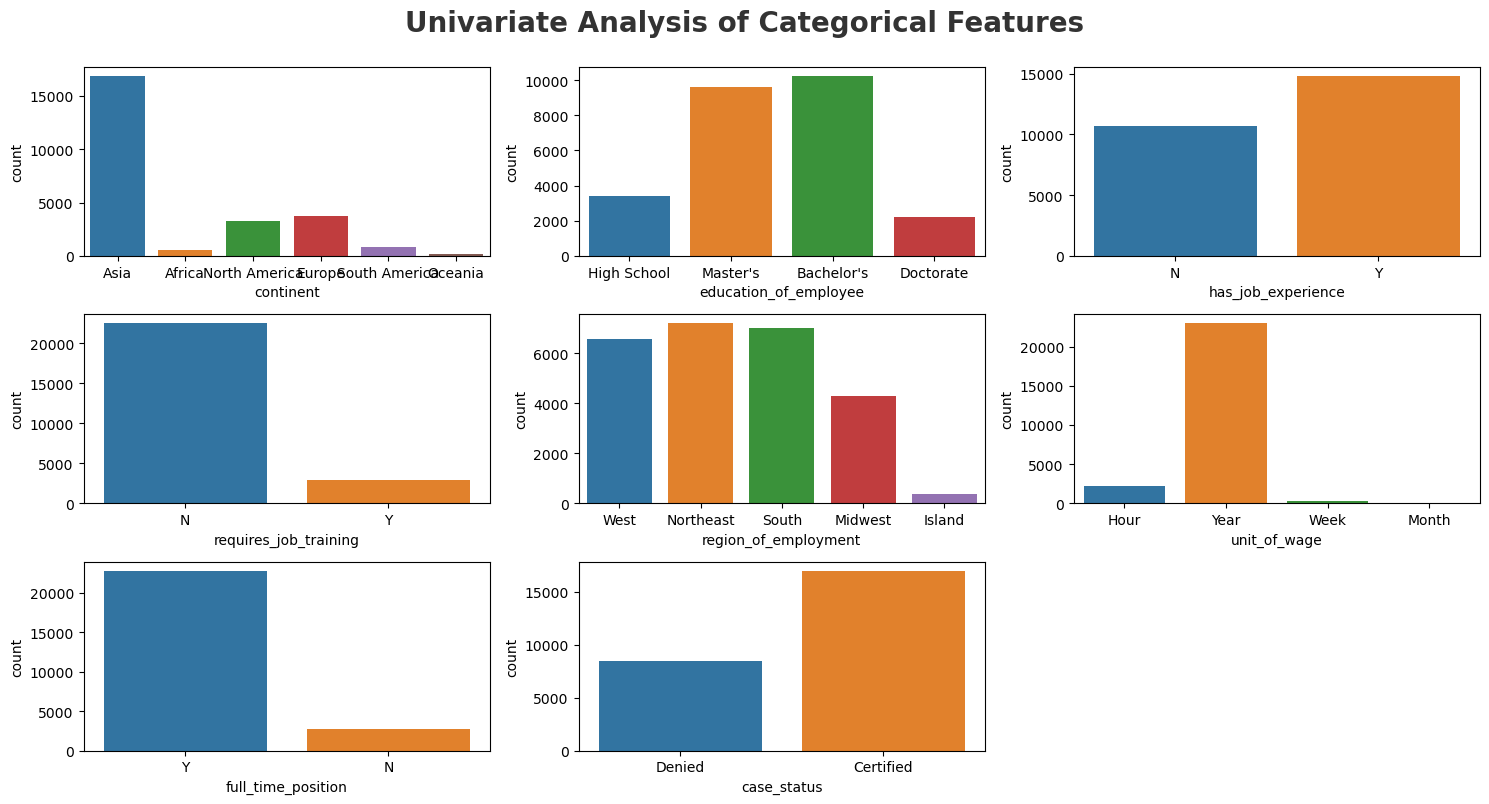

In [13]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

<h4>Insights</h4>

requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.<br>
In rest of the columns are balanced.

<h3>Multivariate Analysis</h3>
Multivariate analysis is the analysis of more than one variable.

In [14]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


<h3>Check Multicollinearity in Numerical features</h3>

In [15]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<h4>Insights</h4>

There is no multicollinearity between any variables

<h3>Check Multicollinearity for Categorical features</h3>
<br>
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test<br>

A chi-square statistic is one way to show a relationship between two categorical variables.<br>

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)<br>

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [16]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


<h4>Report</h4>

Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

<h3>Checking Null Values</h3>

In [18]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [19]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


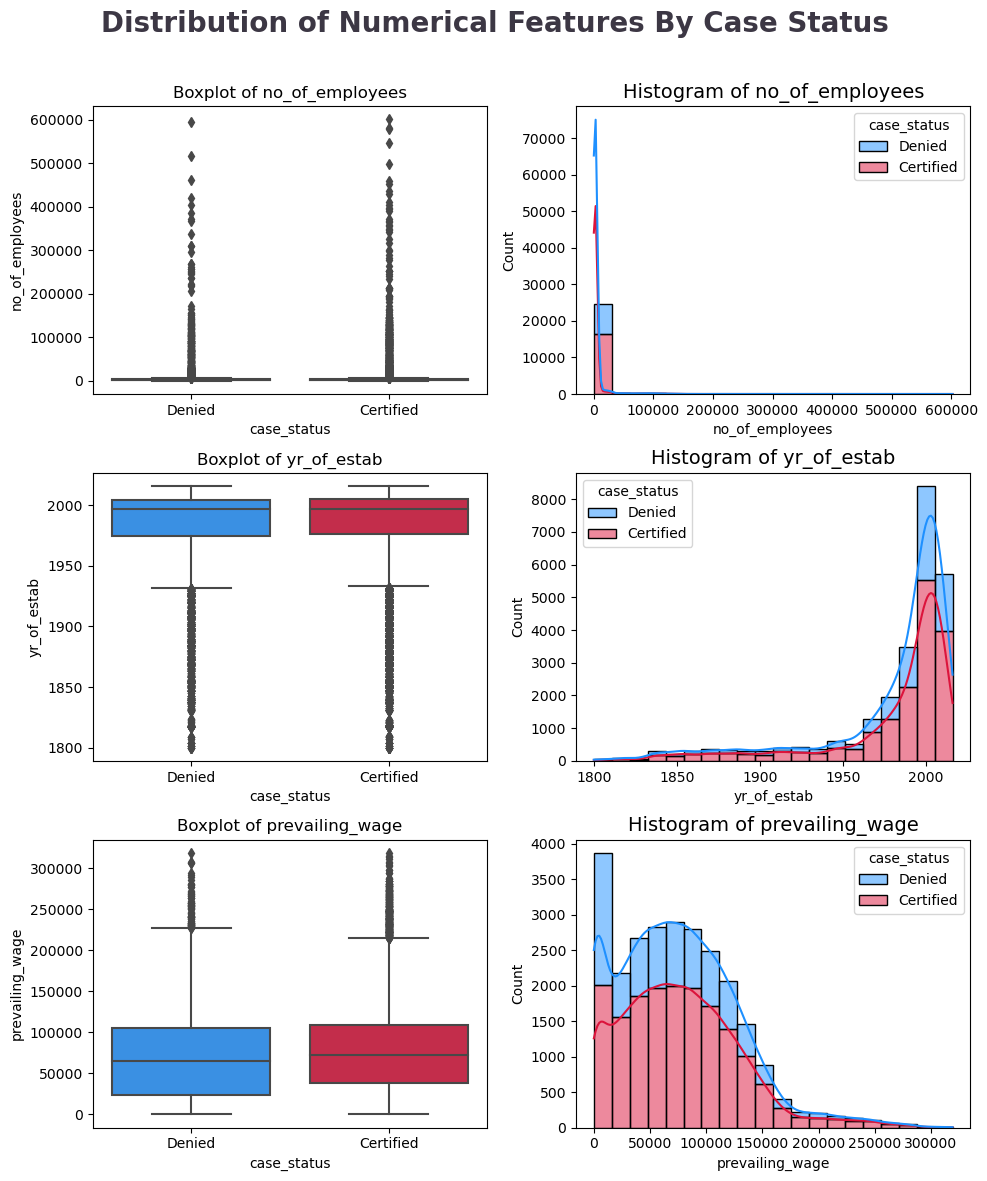

In [20]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')


<h2>Initial Analysis Report</h2>
<br>
No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.<br>
yr_of_estab is left skewed and some outliers below the lower bound of Box plot.<br>
prevailing_wage is right skewed with outliers above upper bound of box plot.<br>
There are No missing values in the dataset.<br>
The case_id column can be deleted because each row has unique values.<br>
The case_status column is the target to predict.<br>
In the Categorical column, features can be made Binary numerical in feature Encoding<br>

<h2>Visualization</h2>
<br>
<h3>4.1 Visualize the Target Feature</h3>

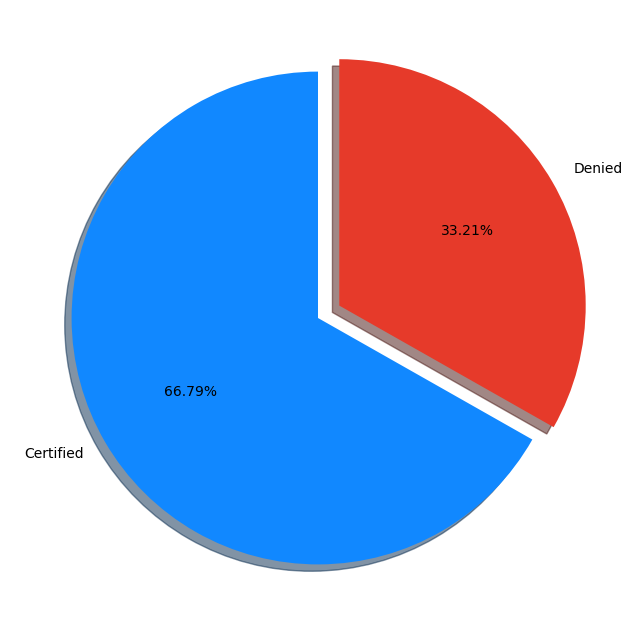

In [21]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

From the chart it is seen that the Target Variable is Imbalanced.
<br>
Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

<h3>4.2 Does applicant Continent has any impact on Visa status ?</h3>

In [22]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

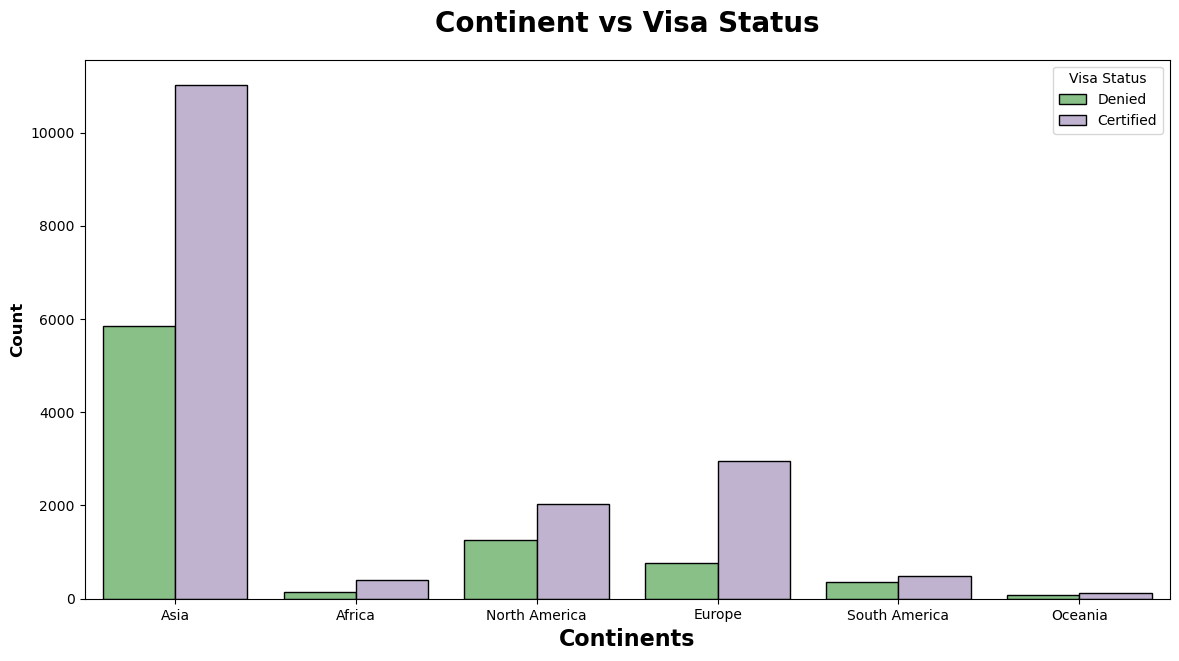

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [24]:
df2 = df.copy()

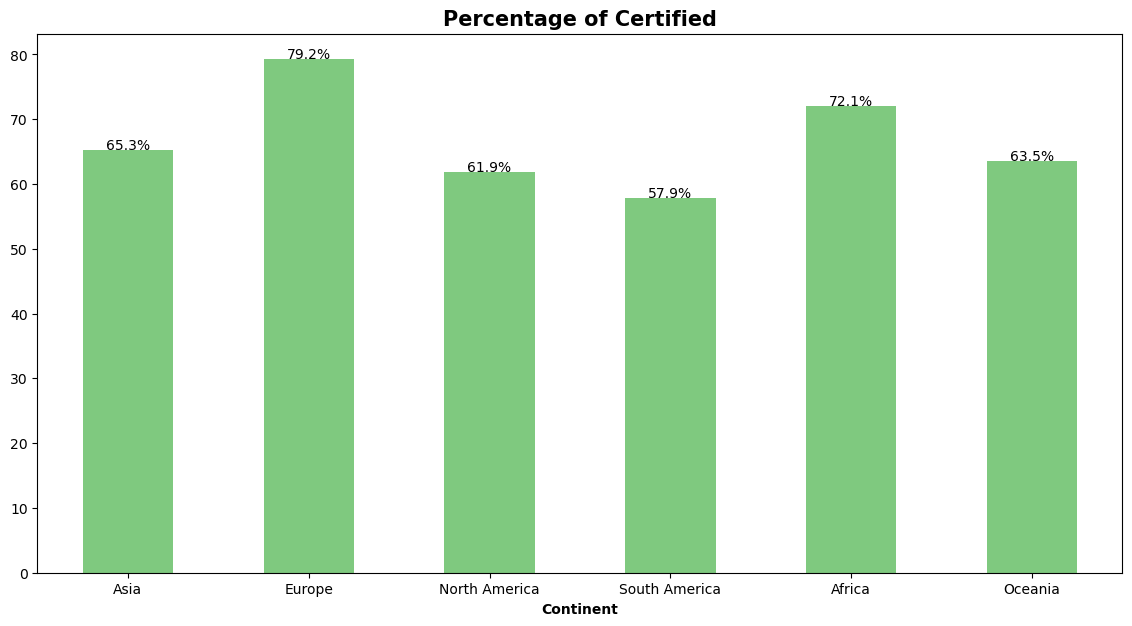

In [25]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Report:</h3>
<br>

As per the Chart Asia applicants applied more than other continents.<br>
43% of Certified applications are from Asia.<br>
This is followed by Europe with 11% of Certified applications.<br>
Highest chance of getting certified if you are from Europe and followed by Africa

<h3>4.3 Does applicant education has any impact on Visa status ?</h3>

In [26]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
education_of_employee case_status             
Bachelor's            Certified      62.214188
                      Denied         37.785812
Doctorate             Certified      87.226277
                      Denied         12.773723
High School           Denied         65.964912
                      Certified      34.035088
Master's              Certified      78.627777
                      Denied         21.372223

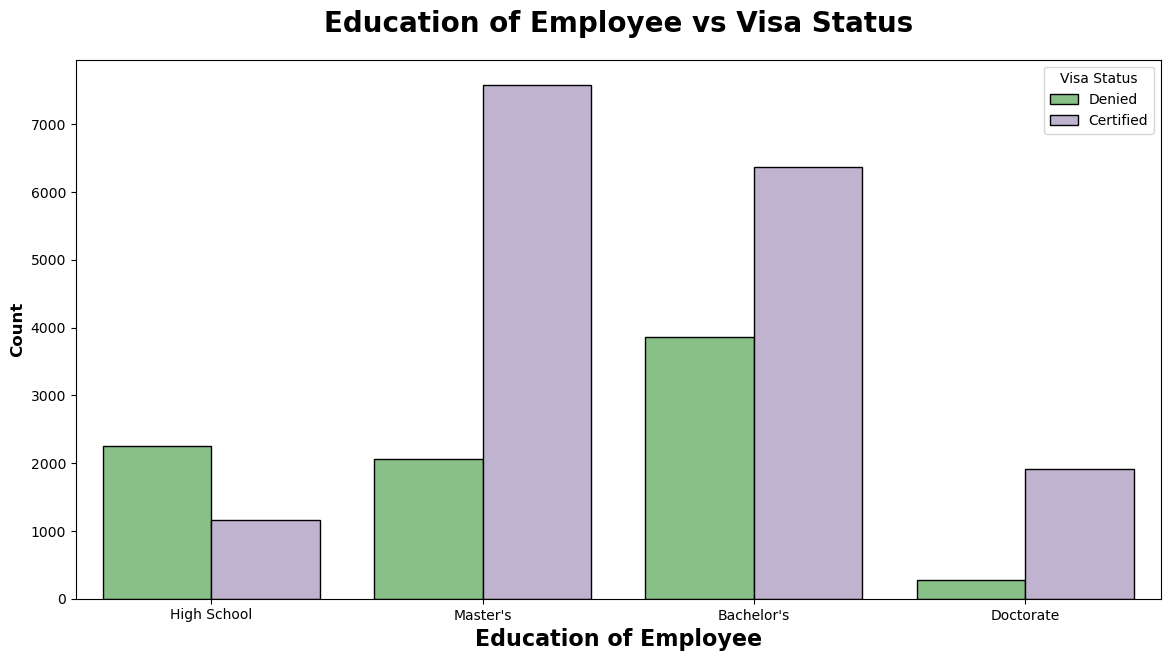

In [27]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

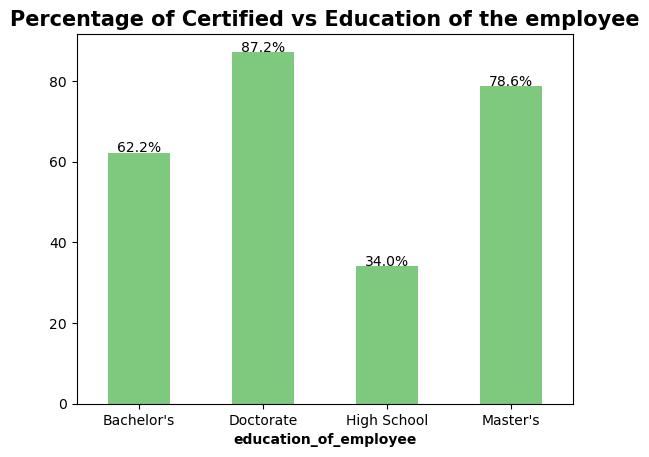

In [28]:

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Insights</h3>
<br>
education status has high impact<br>
Doctorate and Master's graduates have higher cange of being accepted then the others

<h3>4.4 Does applicant's previous work experience has any impact on Visa status ?</h3>

In [29]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
has_job_experience case_status             
N                  Certified      56.134108
                   Denied         43.865892
Y                  Certified      74.476422
                   Denied         25.523578

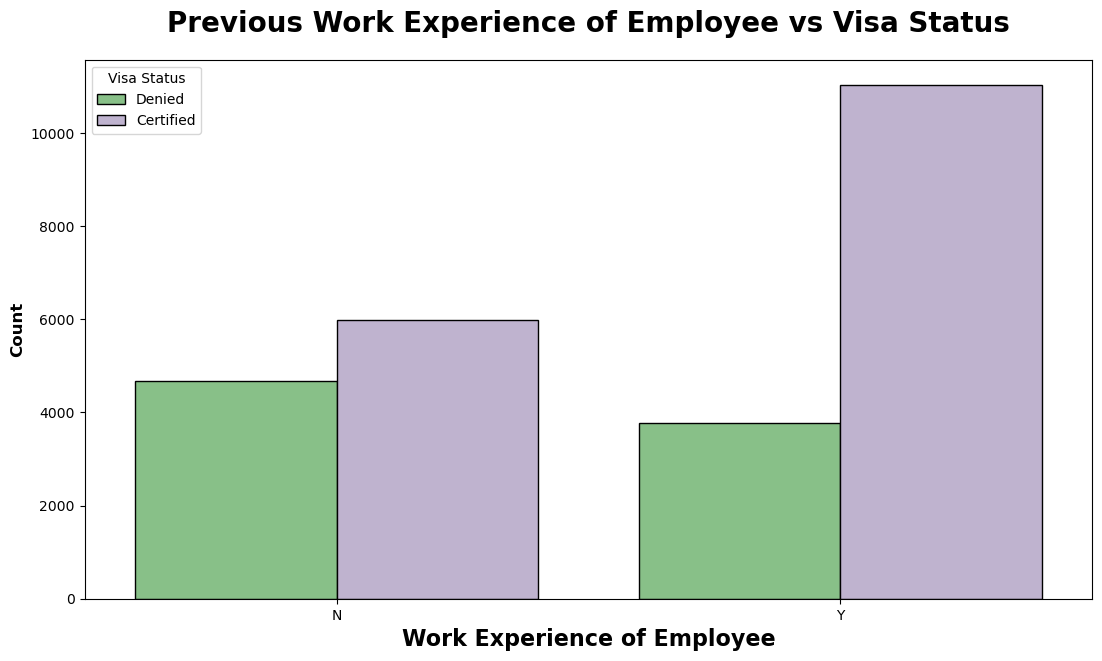

In [30]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

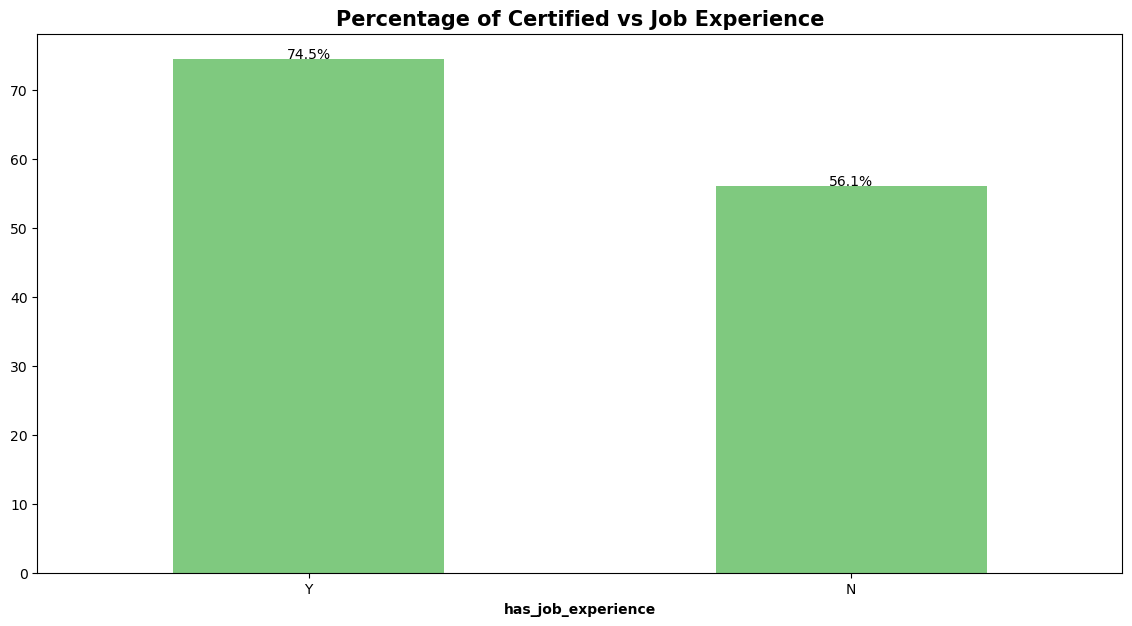

In [31]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Report</h3>
<br>
People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.<br>
People with No previous work experience has been certified 56% and denied 43%.<br>
This means work experience has effect on Visa status.<br>
There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

<h3>4.5 If the Employee requires job training, does it make any impact on visa status?</h3>

In [33]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
requires_job_training case_status             
N                     Certified      66.645949
                      Denied         33.354051
Y                     Certified      67.884941
                      Denied         32.115059

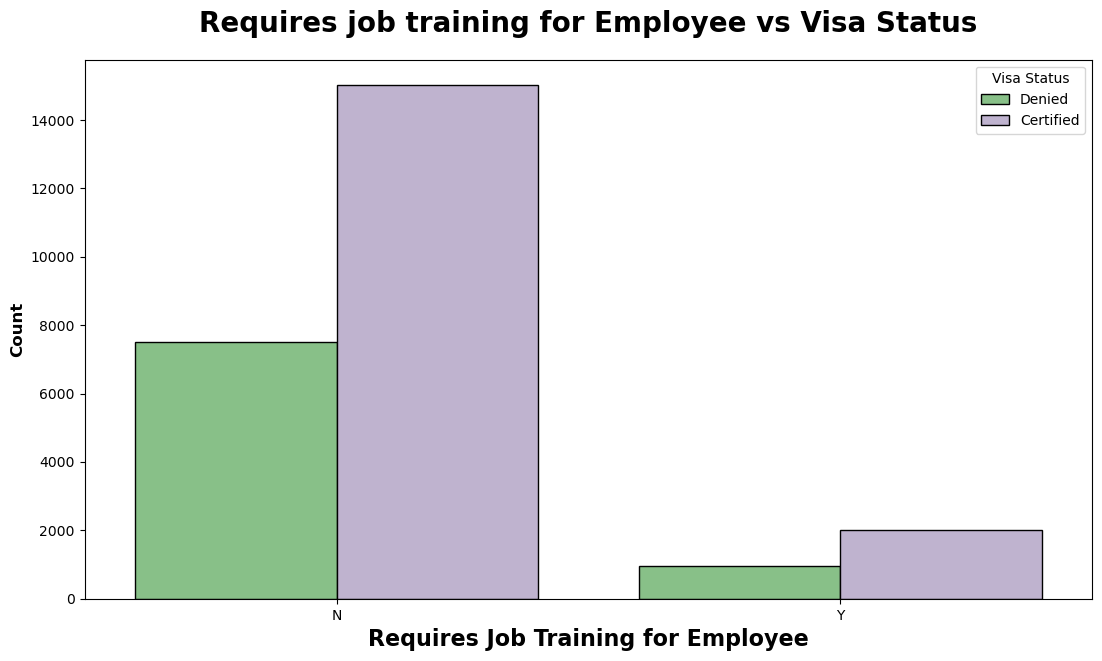

In [34]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

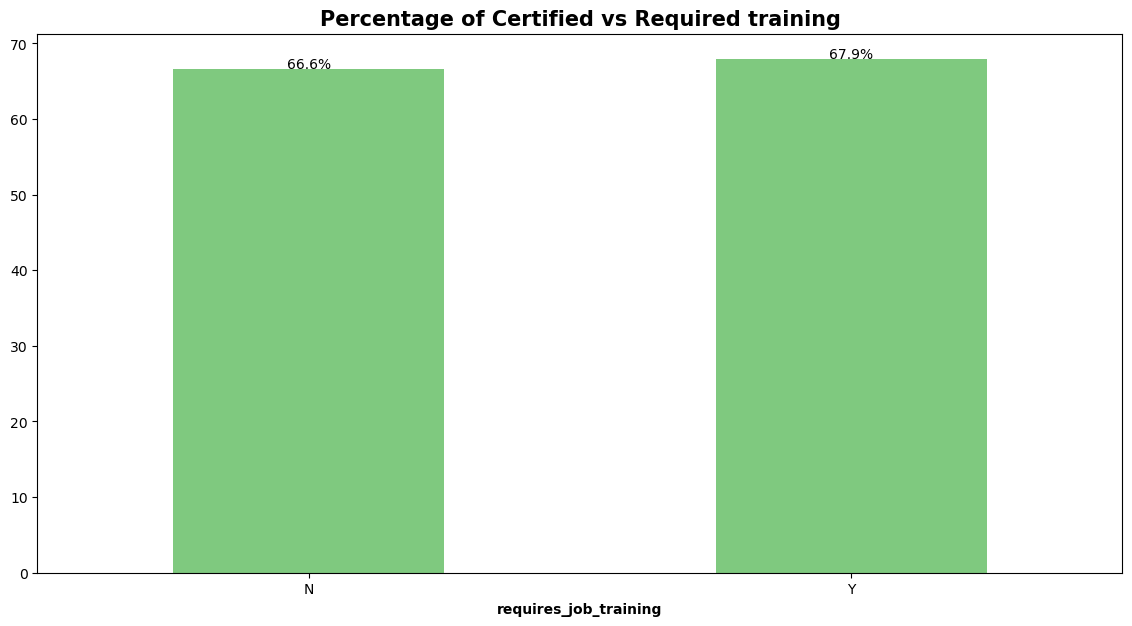

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Report</h3>
<br>
If employee requires job training and it doesn't have any effect on Visa status.<br>
88% of applicant don't require job training.<br>
63% of people who doesnt want job training got certified.<br>
For employees who require job training 67% of people get certified.<br>
As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

<h3>4.6 Does Number of employees of employer has any impact on Visa status?</h3>

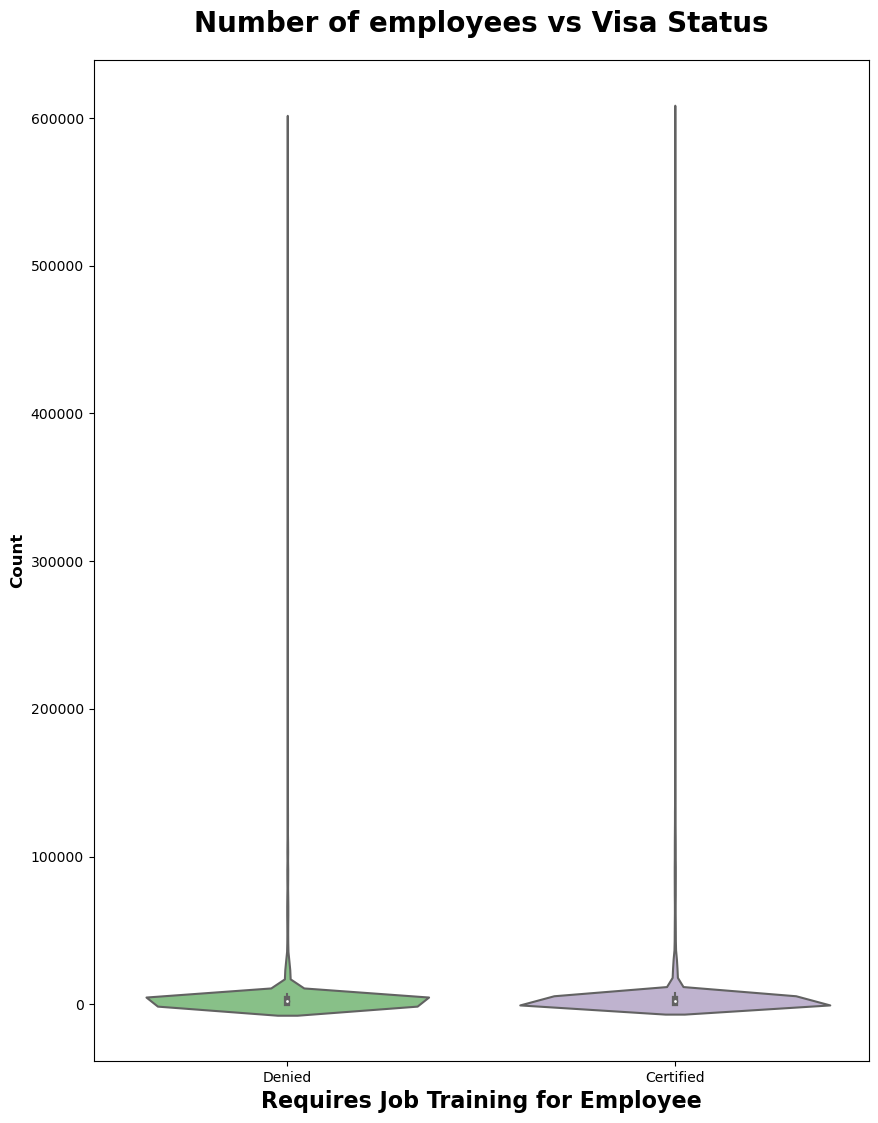

In [36]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

<h3>Insights</h3>

The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

<h3>4.7 Wages and its impact on Visa status</h3>

In [37]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: case_status, dtype: float64

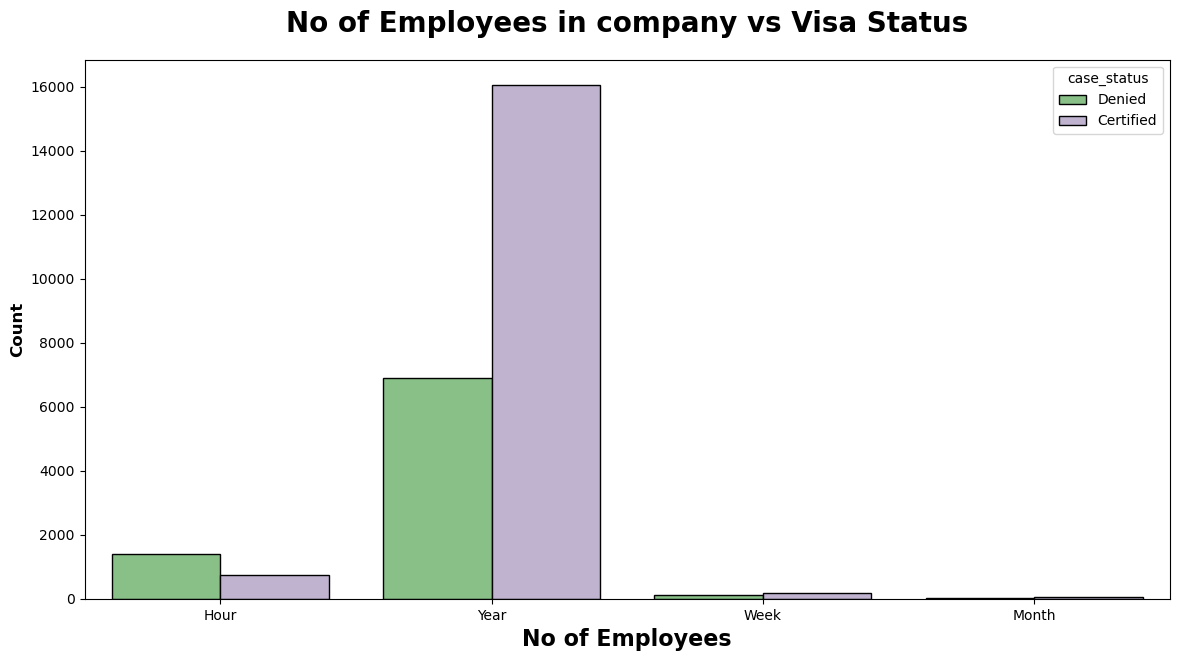

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

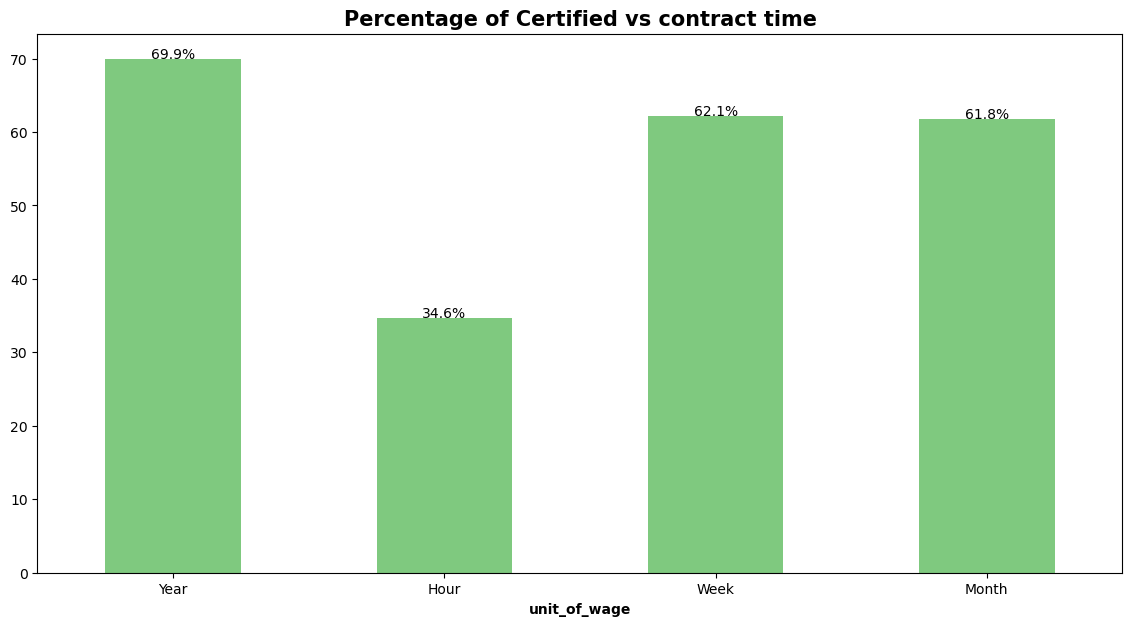

In [39]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Report</h3>

For employees who applied for hourly pay 65% of them were denied.<br>
Yearly unit wage application were accepted for 69% and denied for 31% of the time.<br>
There is a higher chance of yearly contract than other and immediately followed by week and month.

<h3>4.7 Does Region of employment has impact on Visa status ?</h3>

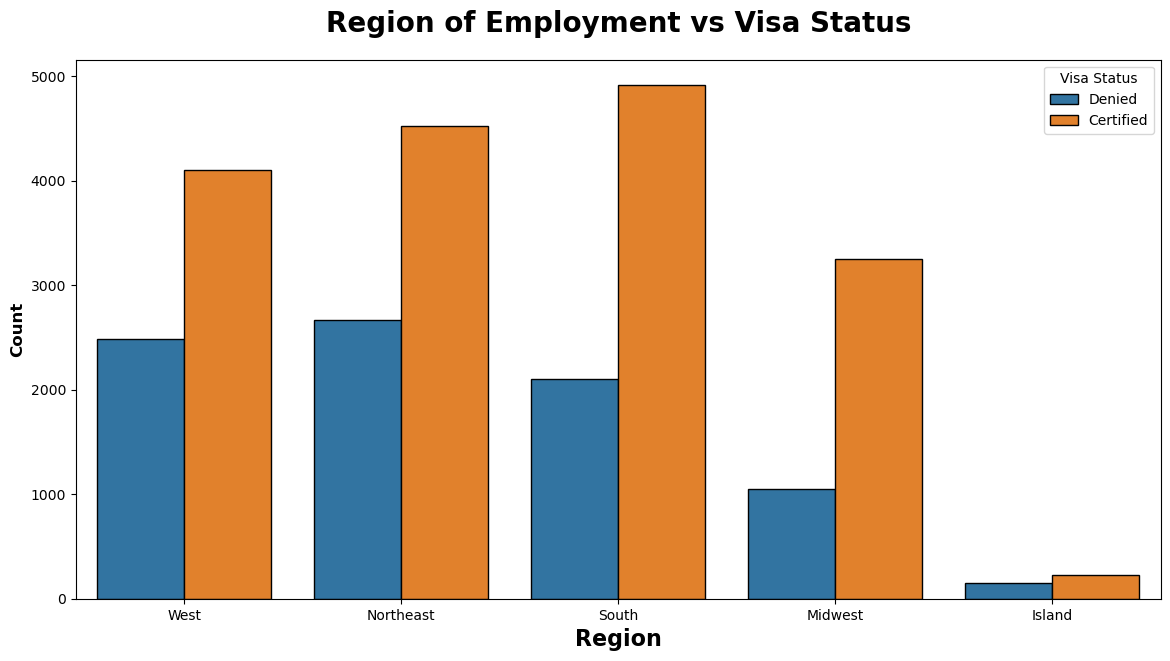

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

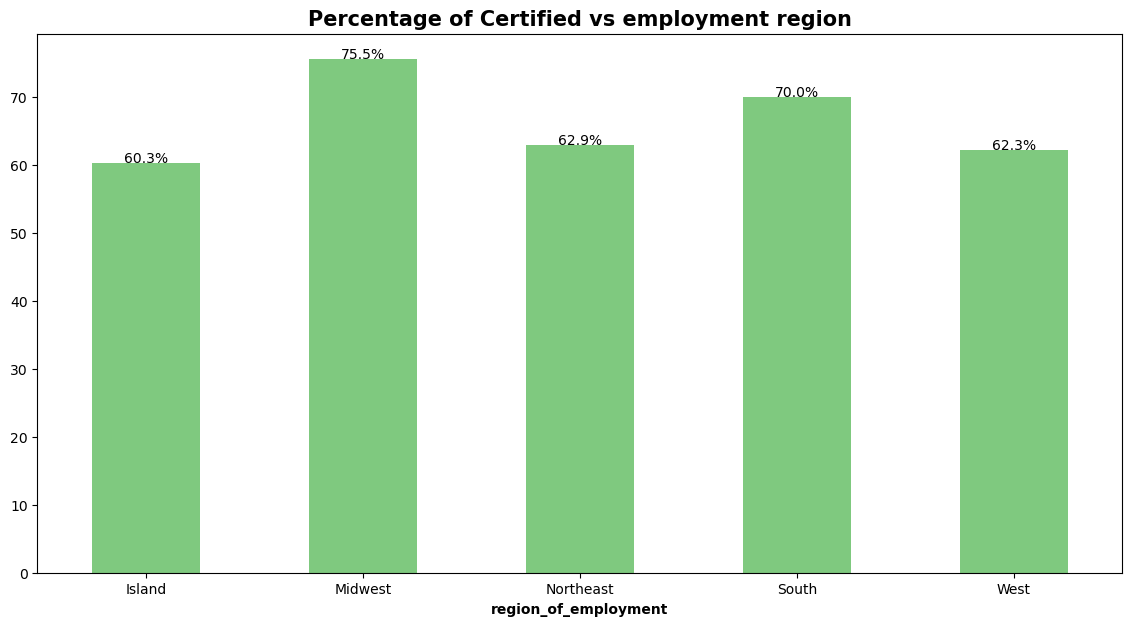

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<h3>Report</h3>
<br>
As per chart all the region have very similar pattern of getting Visa certified and Denied.<br>
There is a slight edge for midwest followed by South region

<h3>4.8 Does Prevailing wage has any impact on Visa status ?</h3>

In [43]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: case_status, Length: 25462, dtype: int64

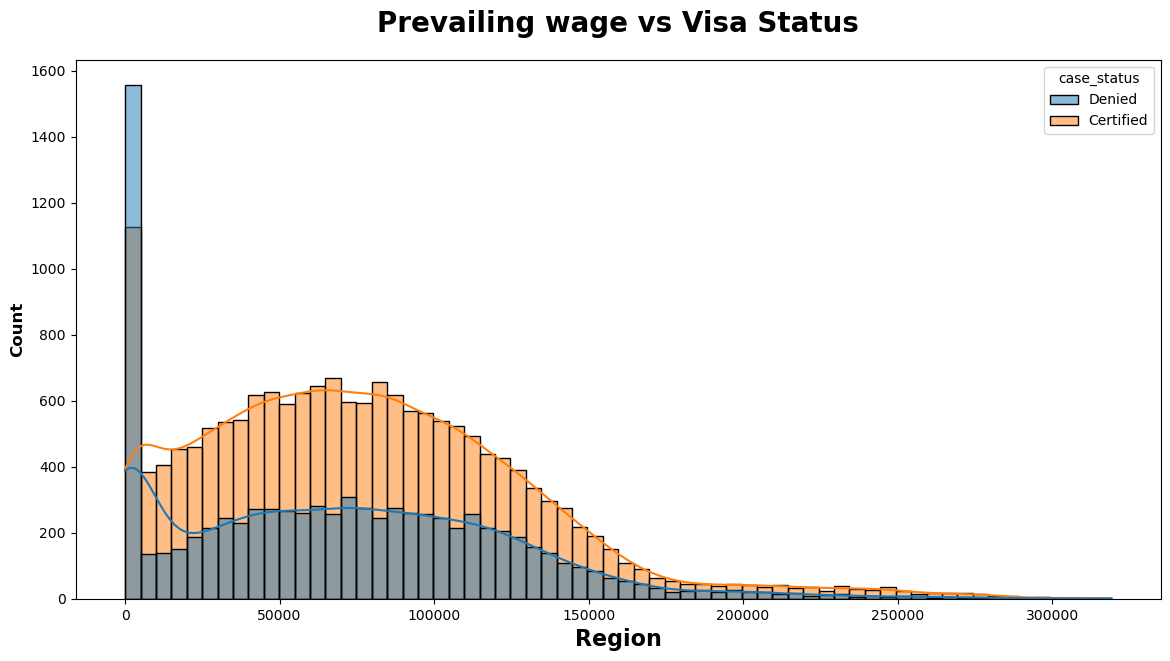

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

<h3>Insights</h3>
<br>

The distribution of both the classes are same but need to handel the outliers.

<h3>4.8.1 Prevailing wage based on Education</h3>

In [45]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


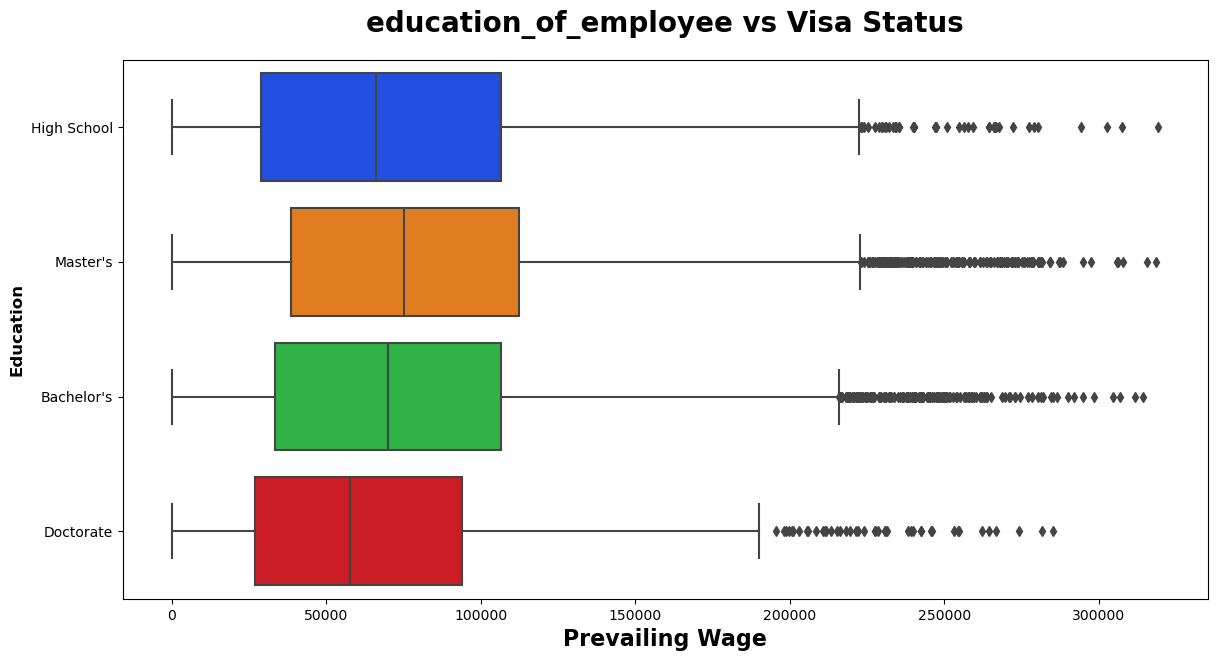

In [46]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

<h3>Report</h3>

Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.<br>
Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

<h3>4.8.2 Prevailing wage based on Job experience</h3>

In [47]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


<h3>Report</h3>

Suprisingly people who has less job experience has more prevailing wage.<br>
No job experience applicant has median prevailing wage as 72k USD.<br>
Previous job experience applicant has median prevailing wage as 69K USD.

<h3>4.8.3 Prevailing wage based on Continent</h3>

In [48]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


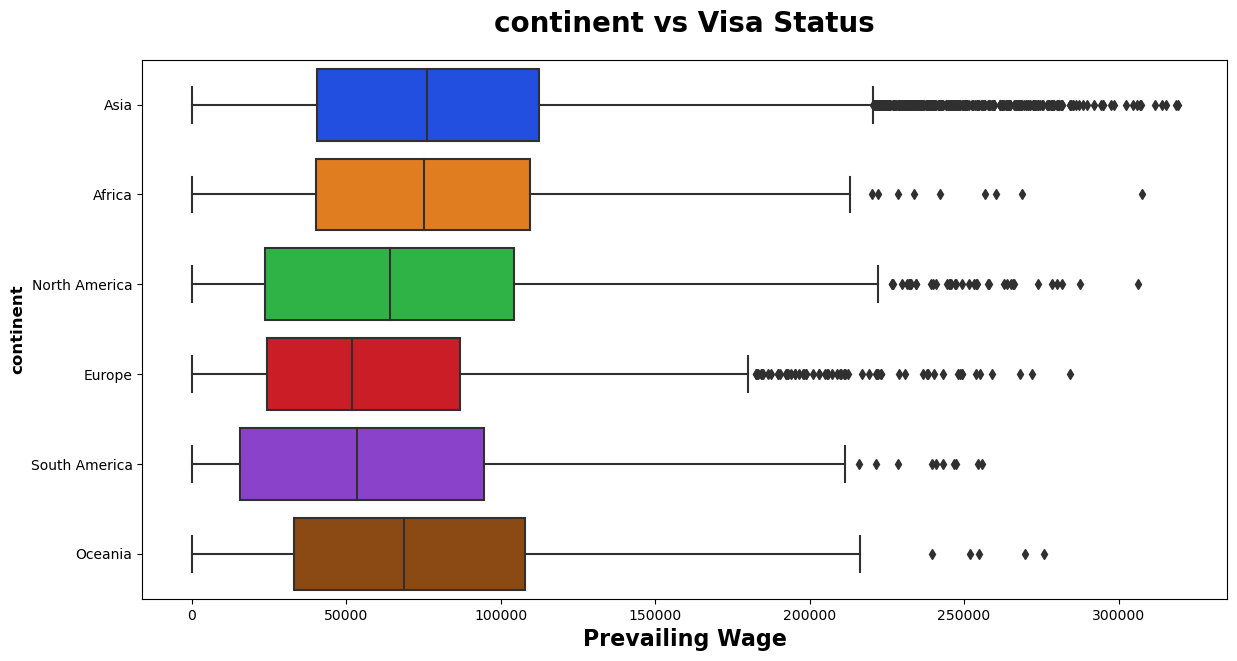

In [49]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

<h3>Report</h3>

Average salary of people from Asia is higher than other continents.

<h3>4.9 Year of Establishment</h3>

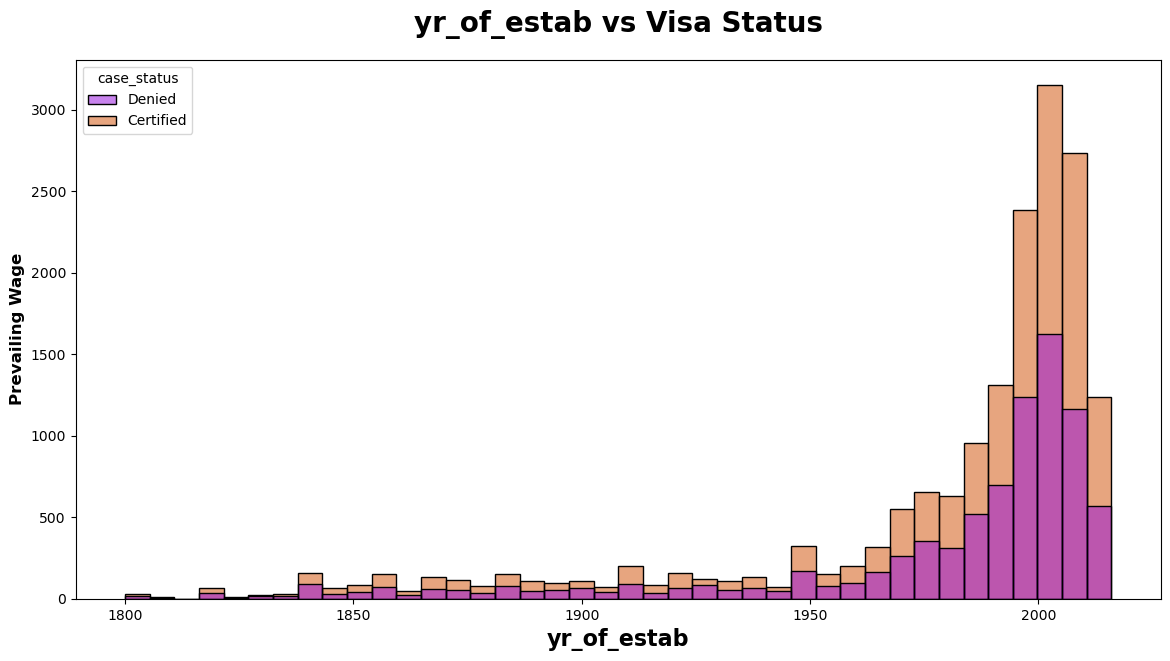

In [50]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()


<h4>Report</h4>

Each bins consists of 5 years.<br>
Many companies were established after year 2000.<br>
The most company establishment happened in year 2000-2005.

<h2>Final Report</h2>
<br>
<h4>case_id column can be dropped as it is an ID.<br>
requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.<br>
no_of_employees, prevailing_wage columns have outllier which should be handled.<br>
continent columns has few unique values with very less count, which can be made as others<br>
Target column case_status is imbalanced can be handled before model building.</h4>